In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
def generate_mins(L=20, batch_size=10000):
    mins = np.zeros(L-2)
    xis = np.arange(2, L)
    for xi_idx, xi in enumerate(xis):
        l_star = np.random.randint(low=0, high=L, size=batch_size) #+ 1
        # l_star = np.zeros(batch_size, dtype=int)
        Ts = np.random.randint(low=1, high=xi, size=batch_size) + 1

        X = np.zeros((batch_size, L))
        for i, (ls, T) in enumerate(zip(l_star, Ts)):
            X[i, ls:min(ls+T,L)] = 1
            if ls+T > L:
                X[i, :ls+T-L] = 1
        
        p = X[X[:, 0] == 1].mean(axis=0)
        mins[xi_idx] = p[L//2] # np.min(p)
        
    return xis, mins

def theory(L: int, xi: int, d: int):
    T1 = 0
    if d >= L - xi:
        T1 = (xi - L) * (d - L + xi + 1) + d*(d+1)/2 - (L-xi)*(L-xi-1)/2
        
    T2 = 0
    if xi >= d:
        T2 = (xi - L) * (xi - d + 1) + (L-d)*(L-d+1)/2 - (L-xi)*(L-xi-1)/2
        
    T = T1 + T2
    p = 2 * T / ( (xi+1) * xi )
    return p

def theory_mins(L):
    xis = np.arange(2, L)
    mins = np.array([ theory(L, xi, L/2) for xi in xis ])
    return xis, mins

def theory_mins_simplified(L):
    xis = np.arange(2, L)
    # mins = (xis - L/2) * (xis - L/2 + 1) / ( (xis-1) * L )
    mins = (xis - L/2) * (xis - L/2 + 1) / ( (xis+1) * (xis) )
    # mins += -0.06 * ((xis - 3*L//4) / (L//4))**2 + 0.055
    mins *= 2 * (xis >= L/2)
    return xis, mins

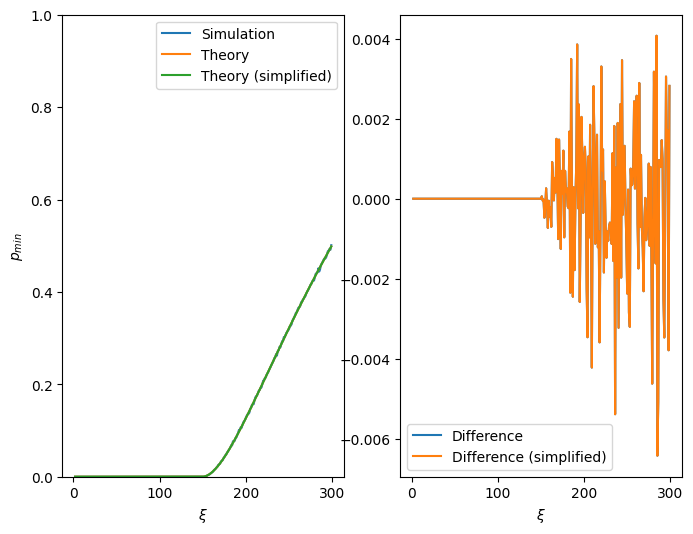

In [144]:
L = 300
# xis, mins_sim = generate_mins(L, batch_size=100000)
xis, mins_theory = theory_mins(L)
xis, mins_simple = theory_mins_simplified(L)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
ax1.plot(xis, mins_sim, label='Simulation')
ax1.plot(xis, mins_theory, label='Theory')
ax1.plot(xis, mins_simple, label='Theory (simplified)')
ax1.set_xlabel(r'$\xi$')
ax1.set_ylabel(r'$p_{min}$')
ax1.set_ylim(0, 1)
ax1.legend()

# ax2.plot(xis, mins_sim/mins_theory, label='Ratio')
ax2.plot(xis, mins_sim-mins_theory, label='Difference')
ax2.plot(xis, mins_sim-mins_simple, label='Difference (simplified)')
ax2.set_xlabel(r'$\xi$')
ax2.legend()

[ 1.06476008e-05 -6.11285862e-05  1.93154025e-03]


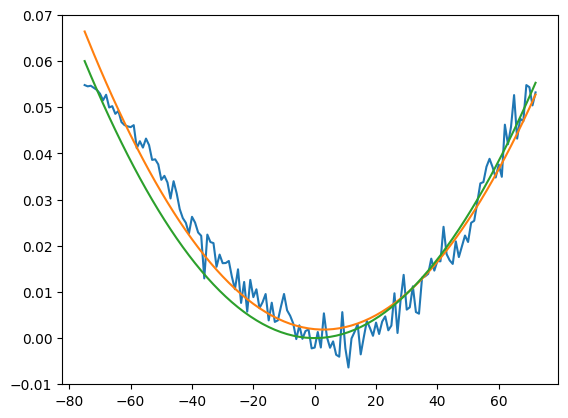

In [88]:
y = (mins_sim-mins_theory)[L//2:]
x = np.arange(len(y)) - L//4
y_ = -y + 0.055
# y_ = np.sqrt(y_)
plt.plot(x, y_)
c_ = np.polyfit(x, y_, 2)
print(c_)
z_ = np.polyval(c_, x)
plt.plot(x, z_)
z = 0.06 * (x / (L//4))**2
plt.plot(x, z)
plt.show()

In [87]:
0.06 * (1 / (L//4))**2

1.0666666666666669e-05